In [39]:
#importing all imp libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [40]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Manipulation**

In [41]:
df.shape

(7043, 21)

In [42]:
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',None)

In [43]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
#no of male and female customers-

df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [46]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [47]:
new_customer=df[(df['gender']=='female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed Check')]

In [48]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [49]:
#changing totalcharges to float

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [50]:
new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]

In [51]:
new_customer.shape

(2233, 21)

In [52]:
df['Churn'].dtype

dtype('O')

In [53]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [54]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


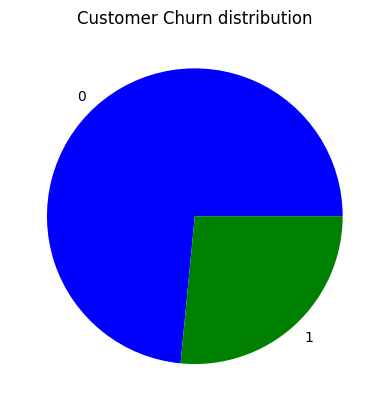

In [55]:
churn_counts=df['Churn'].value_counts()

index=churn_counts.index
values=churn_counts.values
plt.pie(values,labels=index,colors=['blue','green'])
plt.title("Customer Churn distribution")
plt.show()

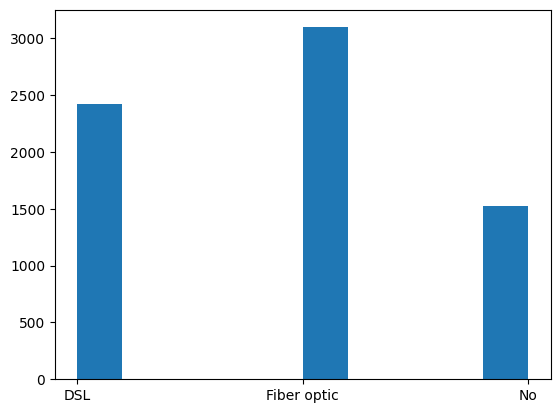

In [56]:
plt.hist(df.InternetService)
plt.show()

In [57]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [58]:
df=df.dropna()
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Building the model with feature=tenure and target=Churn**

**Model-1**













In [59]:

x=df[['tenure']]
y=df.Churn

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

#building ANN------------

model=models.Sequential([
    layers.Dense(16,activation='relu',input_shape=(1,)),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
history=model.fit(x_train_scaled,y_train,epochs=150,batch_size=64,validation_split=0.2)

Epoch 1/150
71/71 [==============================] - 1s 4ms/step - loss: 0.6419 - accuracy: 0.6773 - val_loss: 0.5837 - val_accuracy: 0.7218
Epoch 2/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7373 - val_loss: 0.5300 - val_accuracy: 0.7218
Epoch 3/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7373 - val_loss: 0.5181 - val_accuracy: 0.7218
Epoch 4/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7373 - val_loss: 0.5154 - val_accuracy: 0.7218
Epoch 5/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7373 - val_loss: 0.5128 - val_accuracy: 0.7218
Epoch 6/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7373 - val_loss: 0.5118 - val_accuracy: 0.7218
Epoch 7/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7373 - val_loss: 0.5121 - val_accuracy: 0.7218
Epoch 8/150
7

In [62]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"loss={loss},accuracy={accuracy}")

44/44 [==============================] - 0s 1ms/step - loss: 8.2396 - accuracy: 0.7342
loss=8.239558219909668,accuracy=0.7341862320899963


In [63]:
y_pred=model.predict(x_test_scaled)

44/44 [==============================] - 0s 1ms/step


In [64]:
y_pred
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

In [65]:
accuracy_score(y_test,y_pred_classes)

0.7569296375266524

In [66]:
confusion_matrix(y_test,y_pred_classes)

array([[957,  76],
       [266, 108]])

Text(0.5, 1.0, 'epochs vs accuracy')

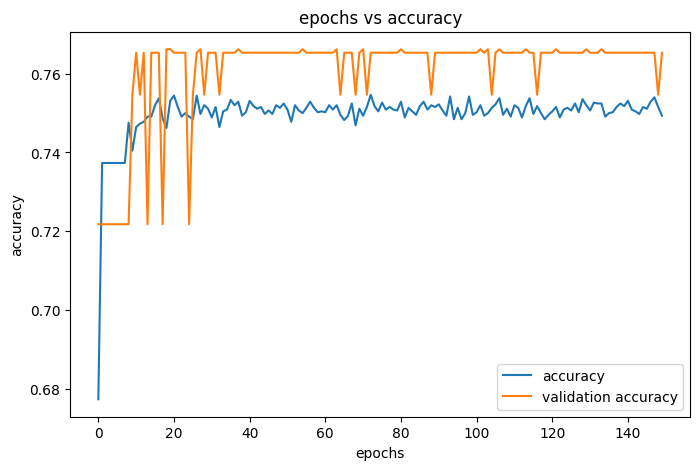

In [67]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("epochs vs accuracy")

**Model-2 with Dropout layers**

In [75]:
model=models.Sequential([
    layers.Dense(16,activation='relu',input_shape=(1,)),
    Dropout(0.3),
    layers.Dense(8,activation='relu'),
    Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history=model.fit(x_train_scaled,y_train,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
71/71 [==============================] - 1s 4ms/step - loss: 0.6564 - accuracy: 0.6653 - val_loss: 0.6181 - val_accuracy: 0.7218
Epoch 2/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7364 - val_loss: 0.5459 - val_accuracy: 0.7218
Epoch 3/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7387 - val_loss: 0.5253 - val_accuracy: 0.7218
Epoch 4/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7353 - val_loss: 0.5198 - val_accuracy: 0.7218
Epoch 5/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7376 - val_loss: 0.5173 - val_accuracy: 0.7218
Epoch 6/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7364 - val_loss: 0.5148 - val_accuracy: 0.7218
Epoch 7/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7362 - val_loss: 0.5139 - val_accuracy: 0.7218
Epoch 8/150
7

In [78]:
y_pred=model.predict(x_test_scaled)

44/44 [==============================] - 0s 1ms/step


In [79]:
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

In [80]:
accuracy_score(y_test,y_pred_classes)

0.7341862117981521

In [81]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"loss={loss},accuracy={accuracy}")

44/44 [==============================] - 0s 2ms/step - loss: 8.4273 - accuracy: 0.7342
loss=8.427305221557617,accuracy=0.7341862320899963


In [82]:
confusion_matrix(y_test,y_pred_classes)

array([[1033,    0],
       [ 374,    0]])

Text(0.5, 1.0, 'epochs vs accuracy')

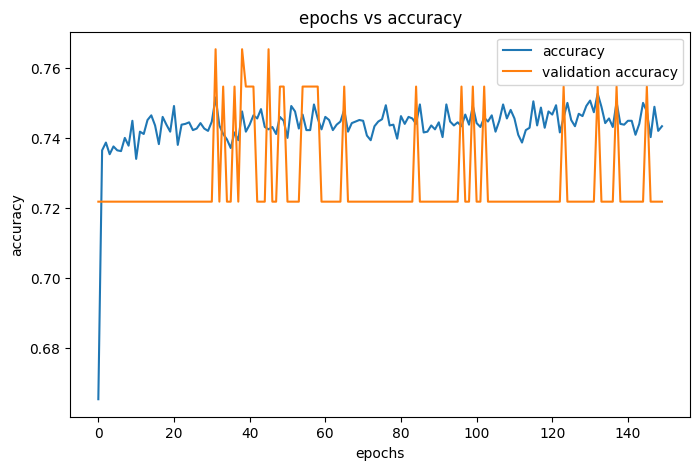

In [83]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("epochs vs accuracy")

In [84]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


**Model-3 with 3 features**

In [85]:
features=['tenure','MonthlyCharges','TotalCharges']
x=df[features]
y=df['Churn']

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

#building ANN------------

model=models.Sequential([
    layers.Dense(12,activation='relu',input_shape=(3,)),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


In [88]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
71/71 [==============================] - 1s 4ms/step - loss: 0.5958 - accuracy: 0.7373 - val_loss: 0.5651 - val_accuracy: 0.7218
Epoch 2/150
71/71 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7371 - val_loss: 0.5081 - val_accuracy: 0.7378
Epoch 3/150
71/71 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7591 - val_loss: 0.4796 - val_accuracy: 0.7609
Epoch 4/150
71/71 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7731 - val_loss: 0.4678 - val_accuracy: 0.7751
Epoch 5/150
71/71 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7760 - val_loss: 0.4605 - val_accuracy: 0.7804
Epoch 6/150
71/71 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7804 - val_loss: 0.4555 - val_accuracy: 0.7858
Epoch 7/150
71/71 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7822 - val_loss: 0.4533 - val_accuracy: 0.7876
Epoch 8/150
7

In [89]:
y_pred=model.predict(x_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

44/44 [==============================] - 0s 1ms/step


In [90]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"loss={loss},accuracy={accuracy}")

44/44 [==============================] - 0s 1ms/step - loss: 414.1127 - accuracy: 0.7342
loss=414.11273193359375,accuracy=0.7341862320899963


In [91]:
confusion_matrix(y_test,y_pred_classes)

array([[952,  81],
       [215, 159]])

Text(0.5, 1.0, 'epochs vs accuracy')

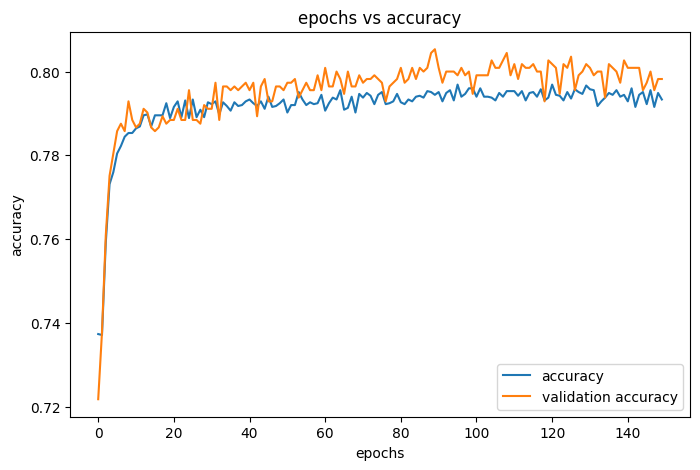

In [92]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("epochs vs accuracy")